<a href="https://colab.research.google.com/github/Neilsimon4/capstone2/blob/main/Regression_module_6_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


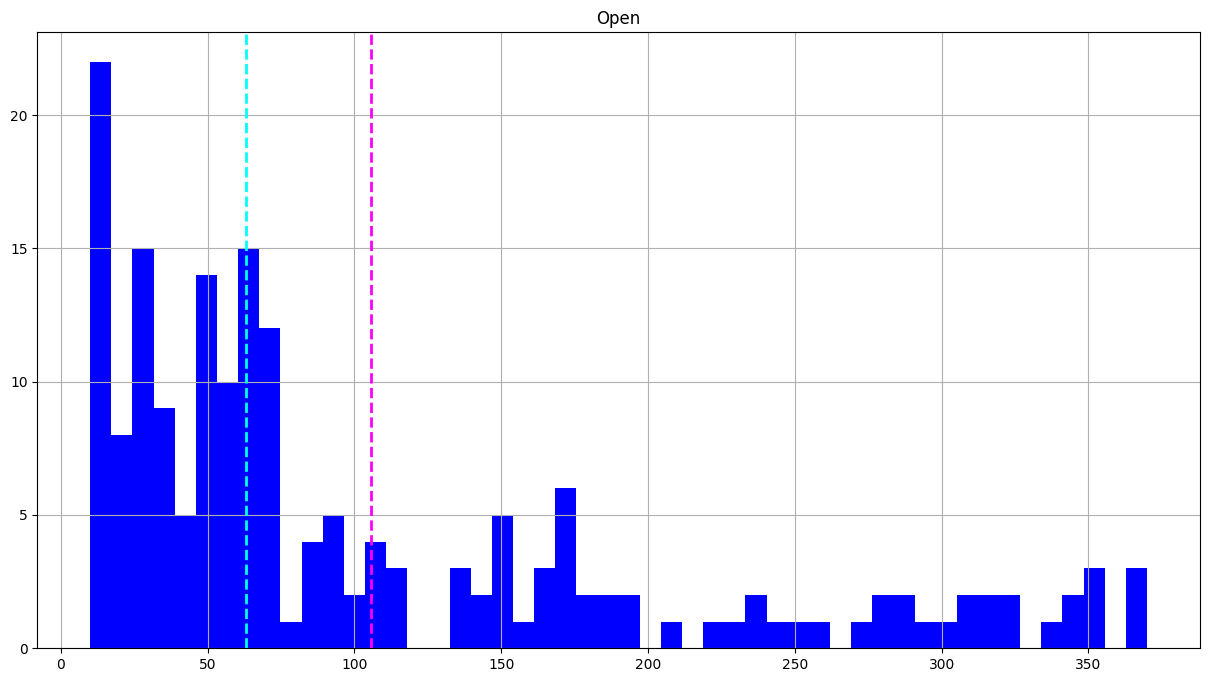

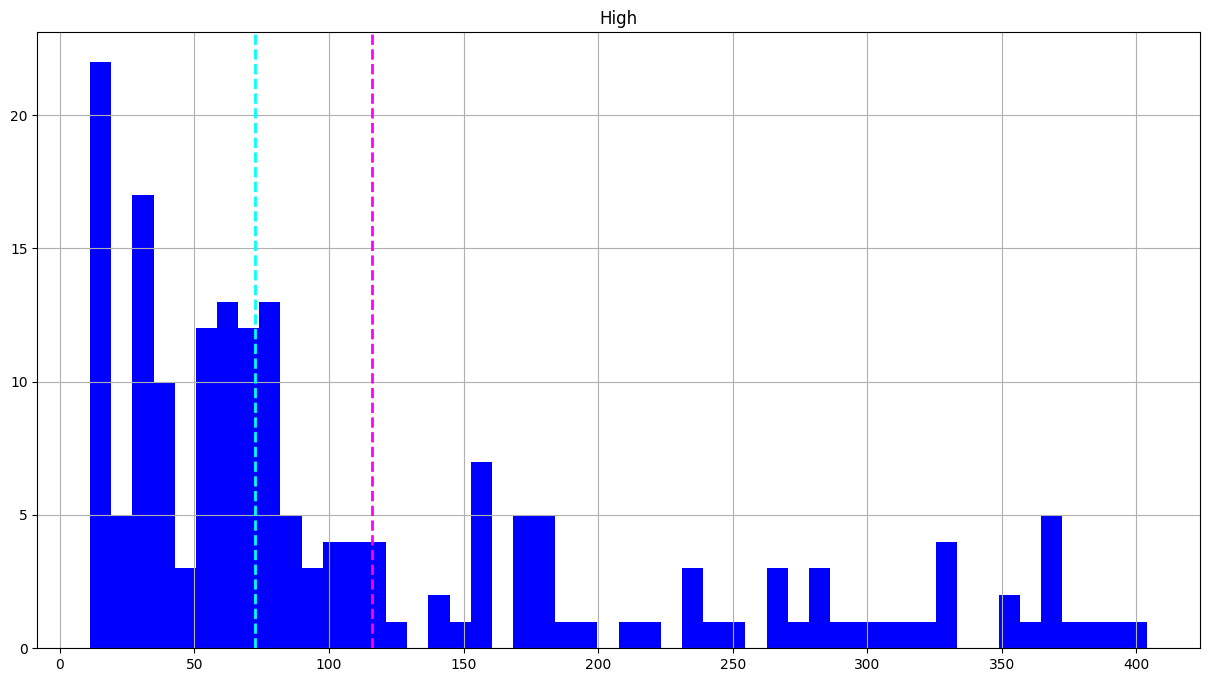

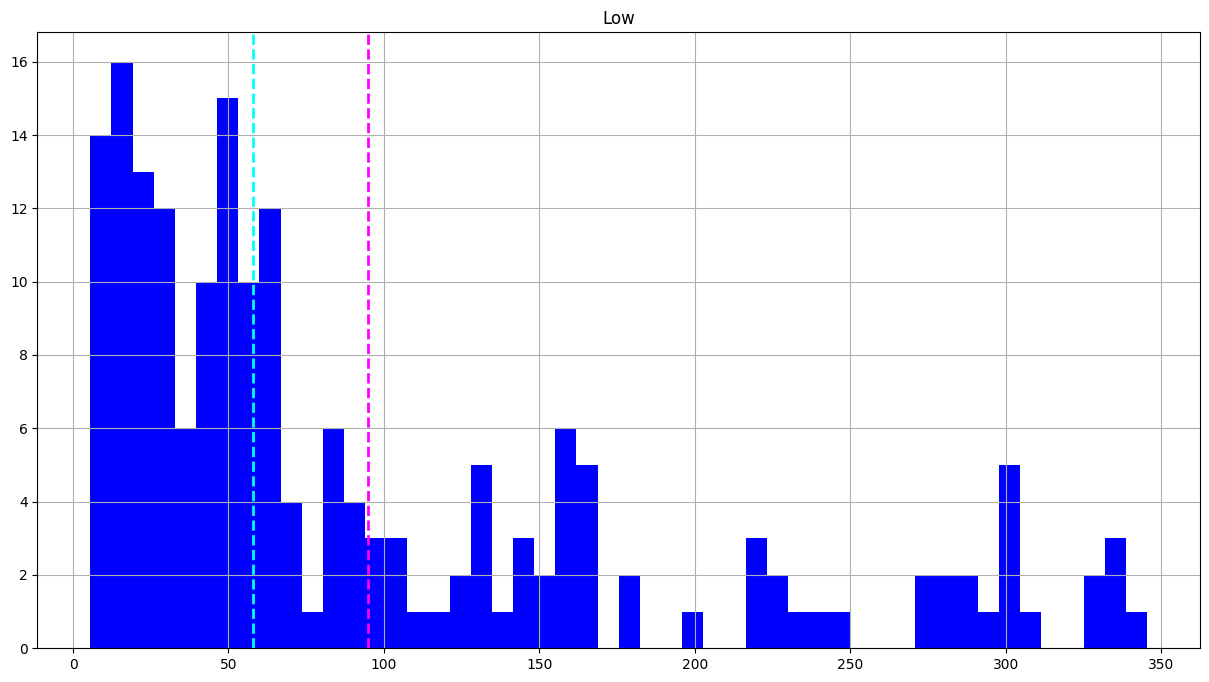

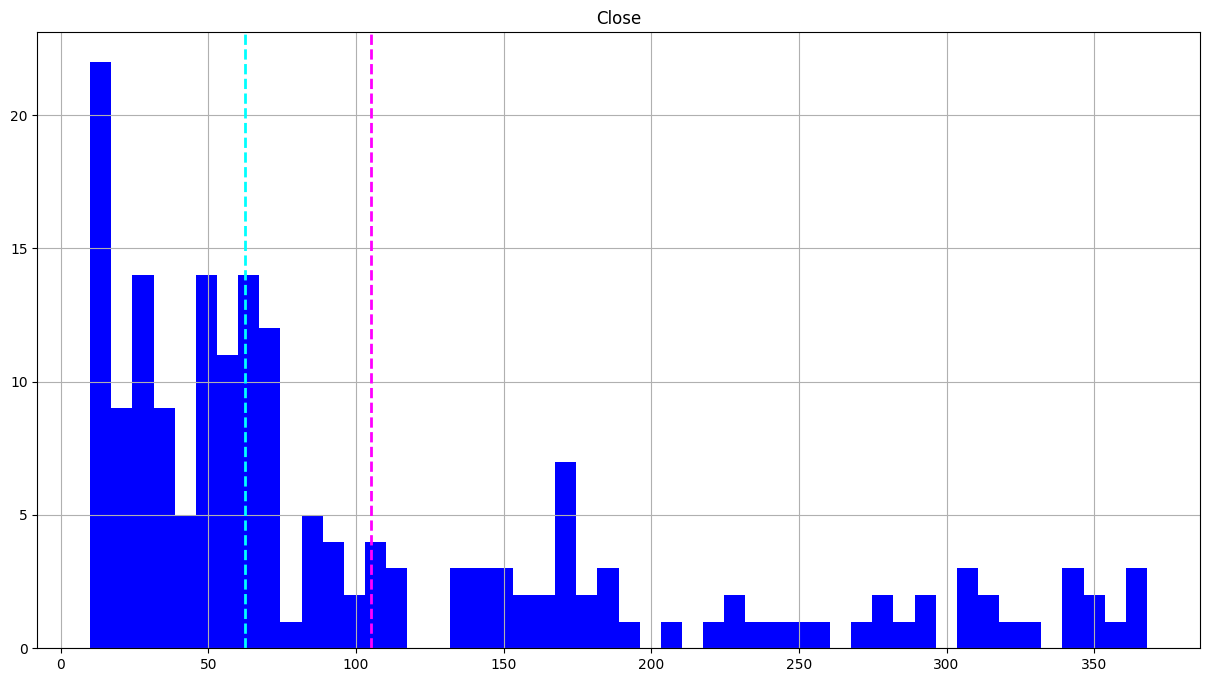

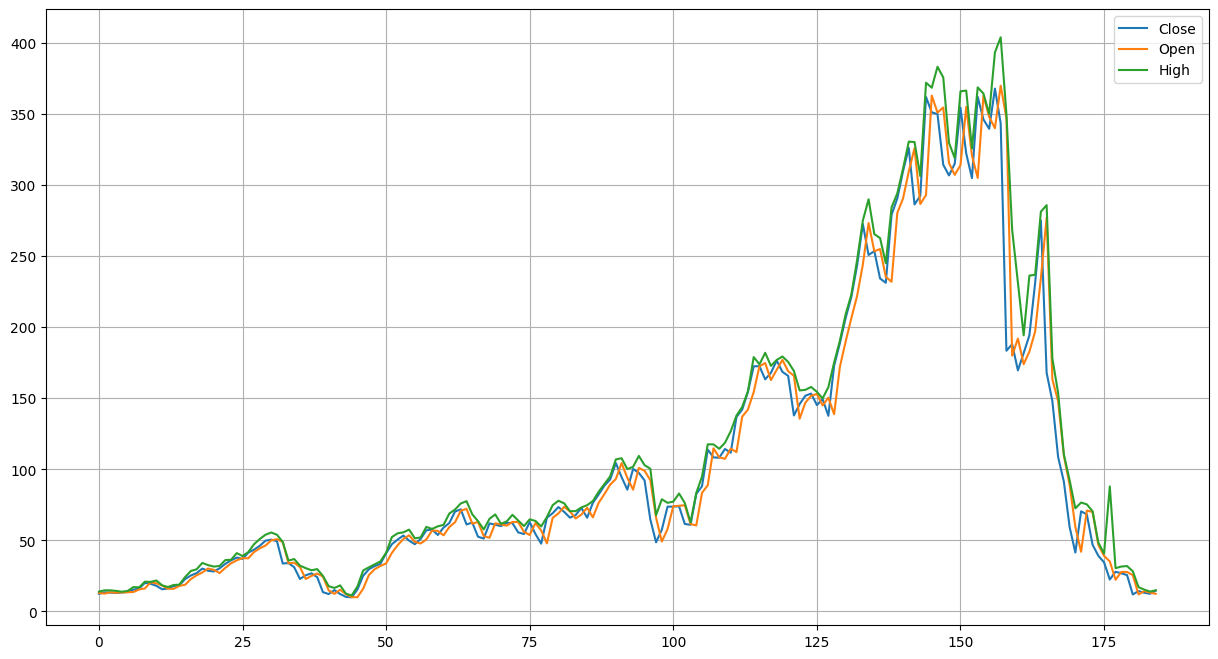

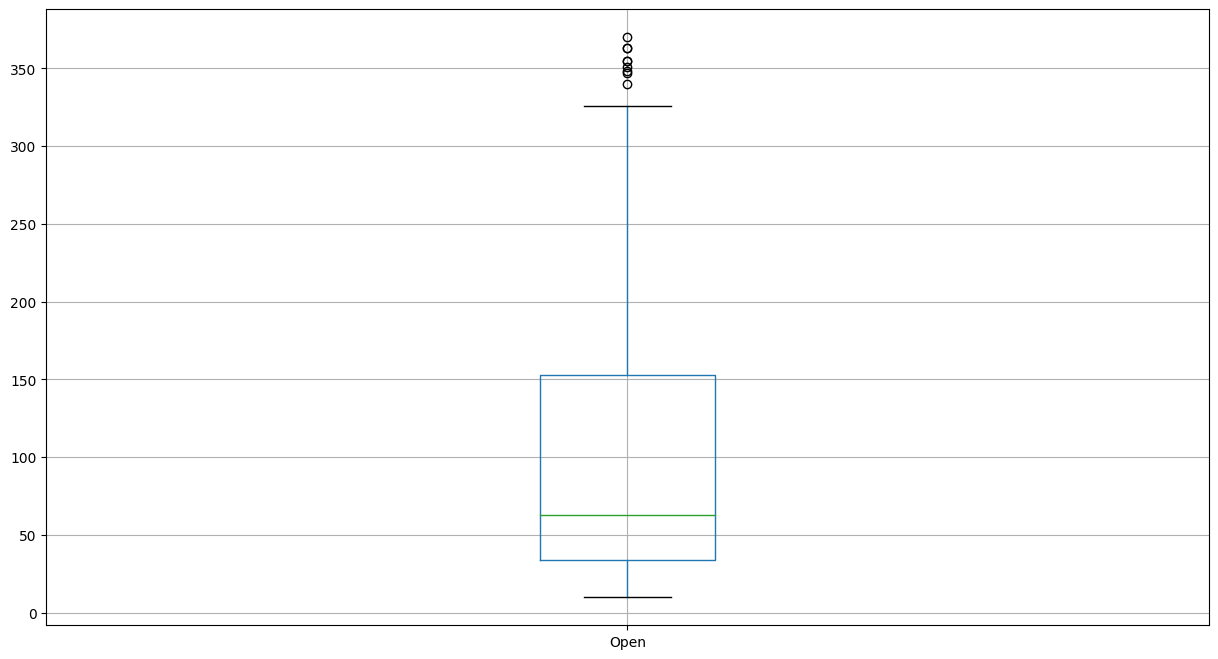

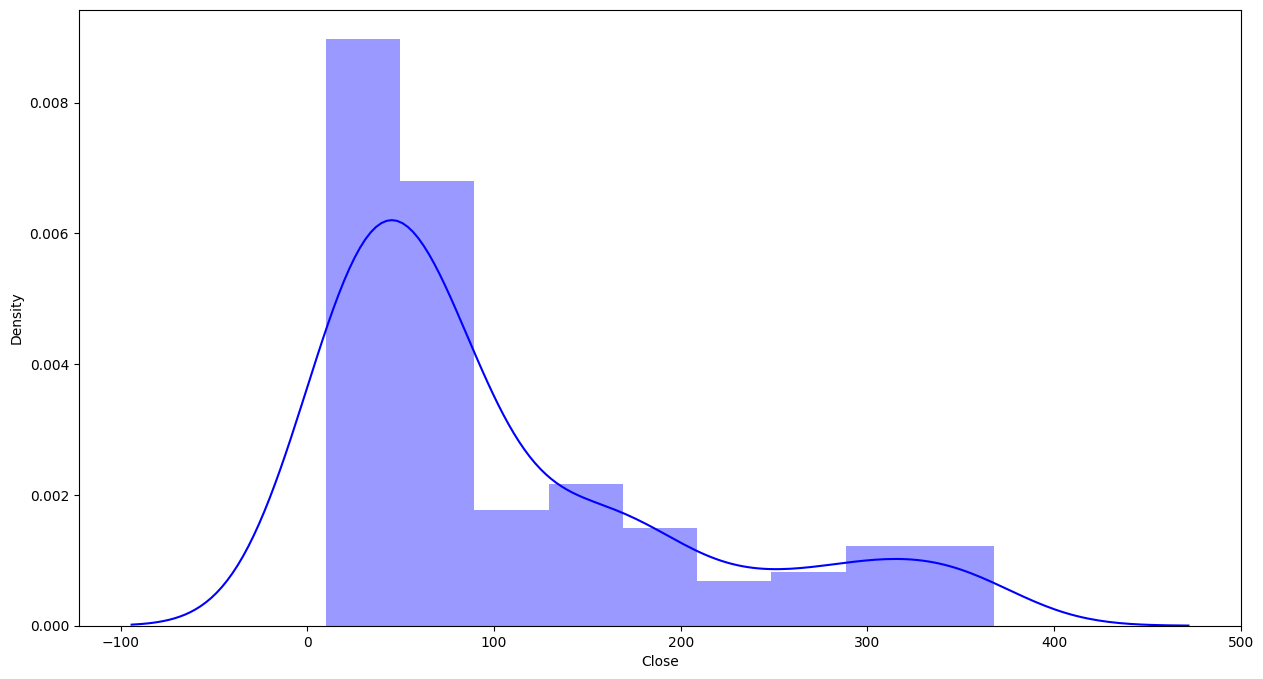

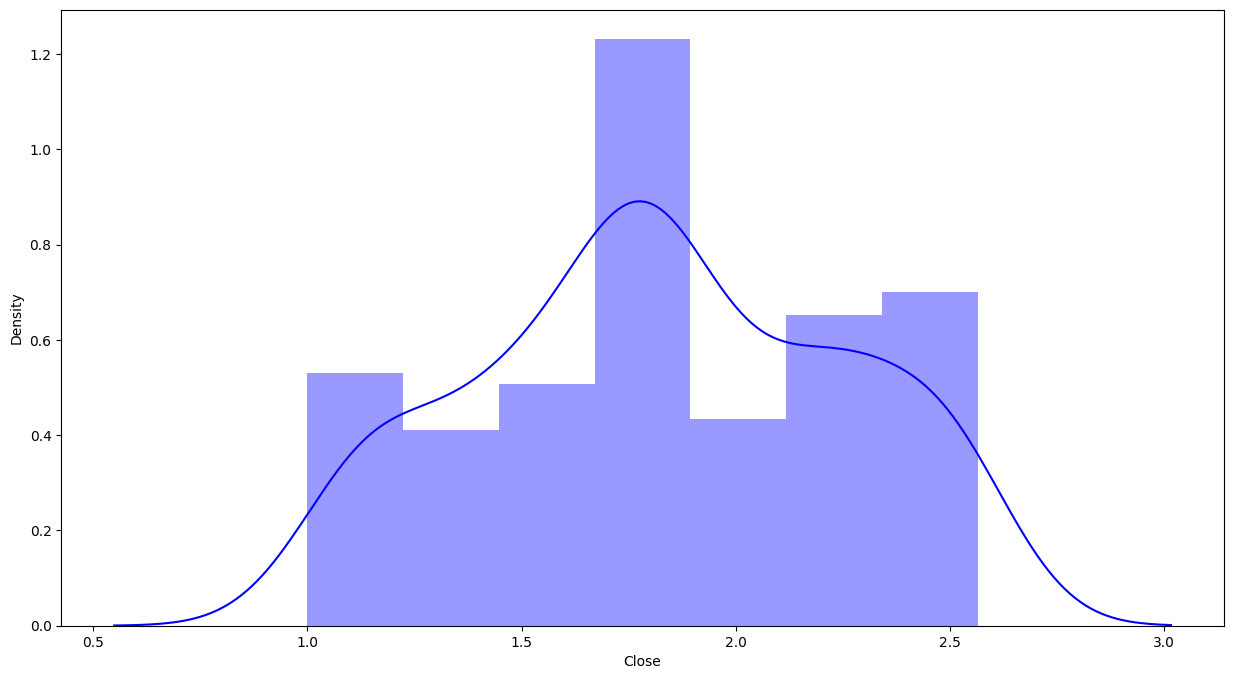

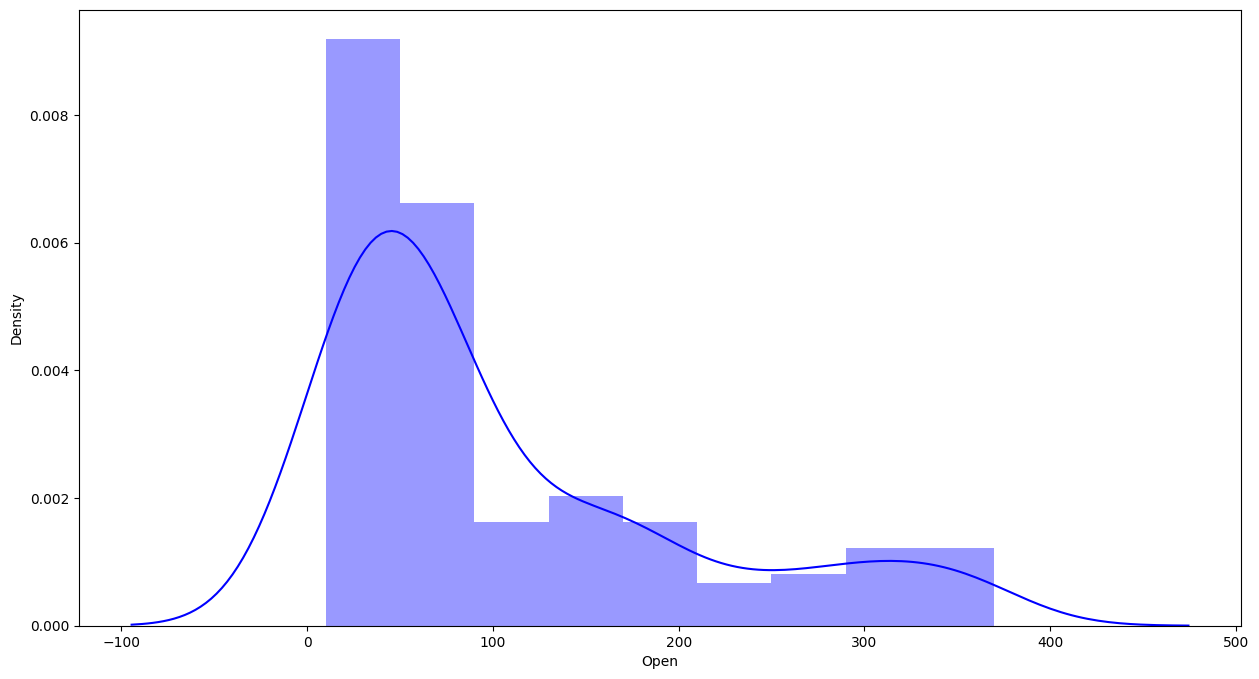

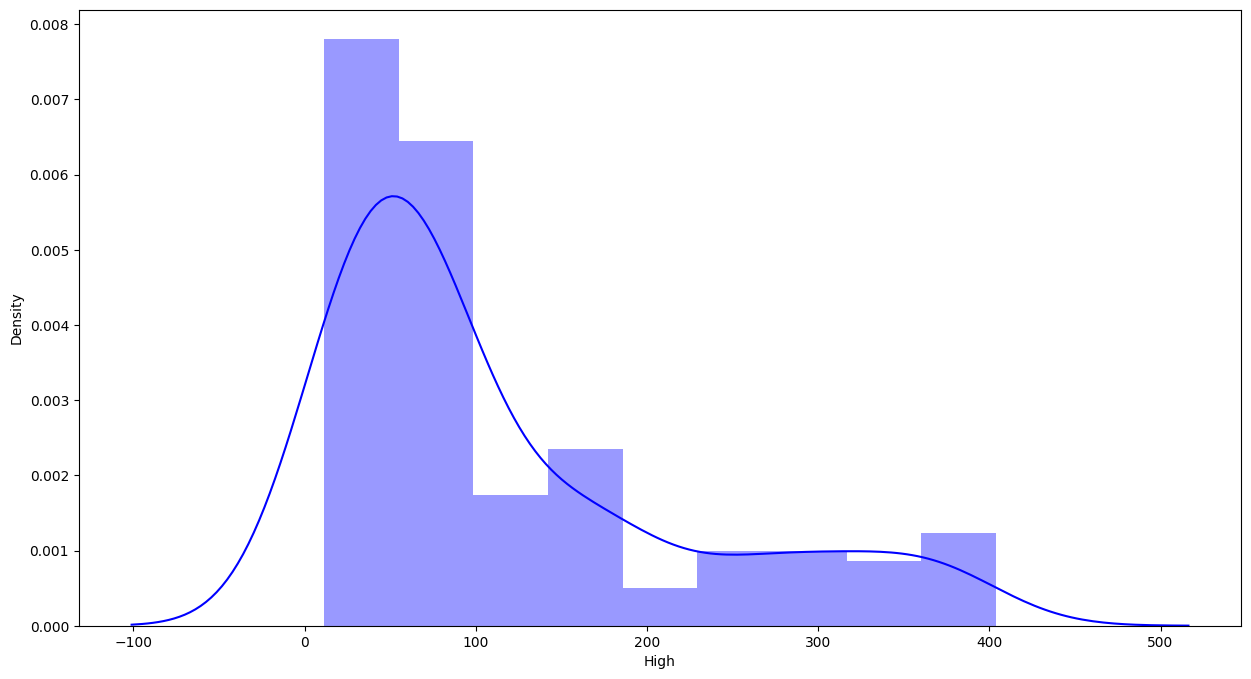

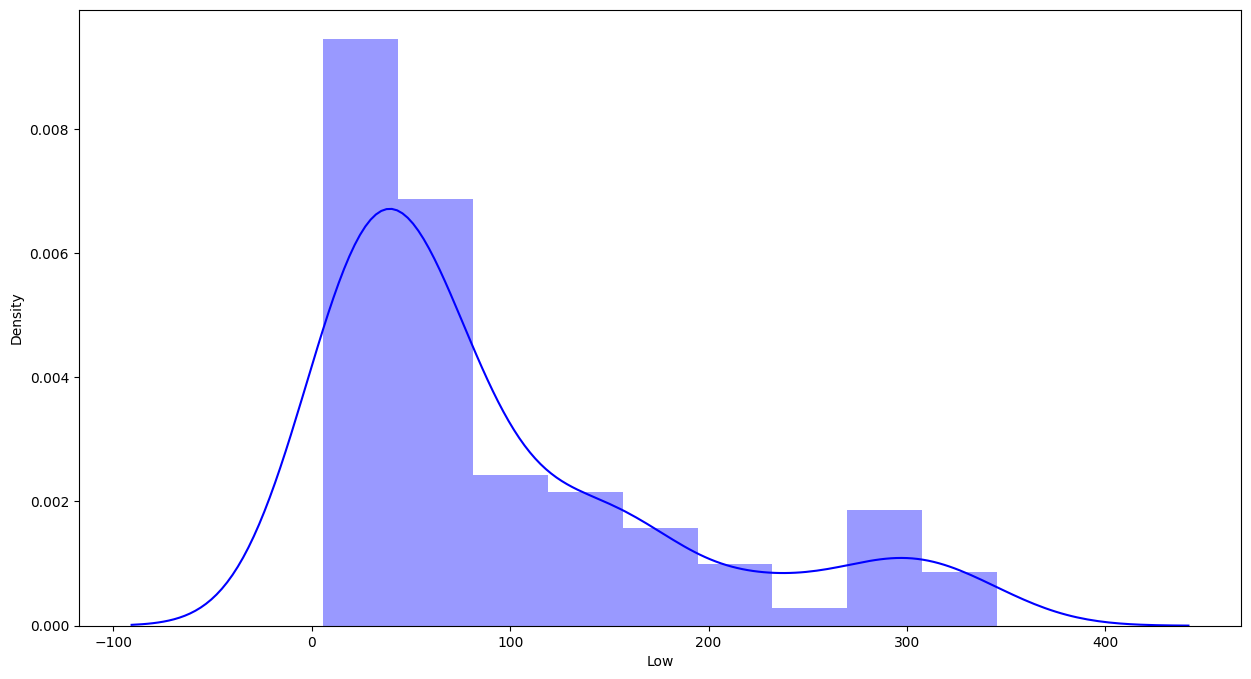

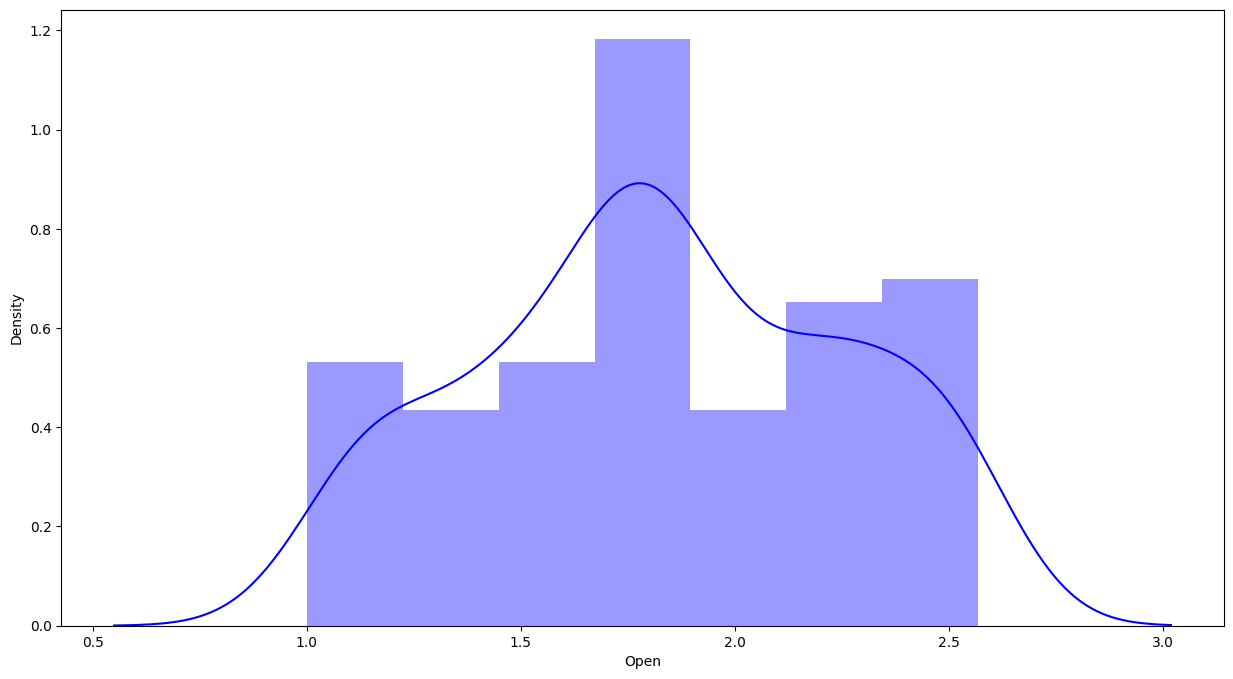

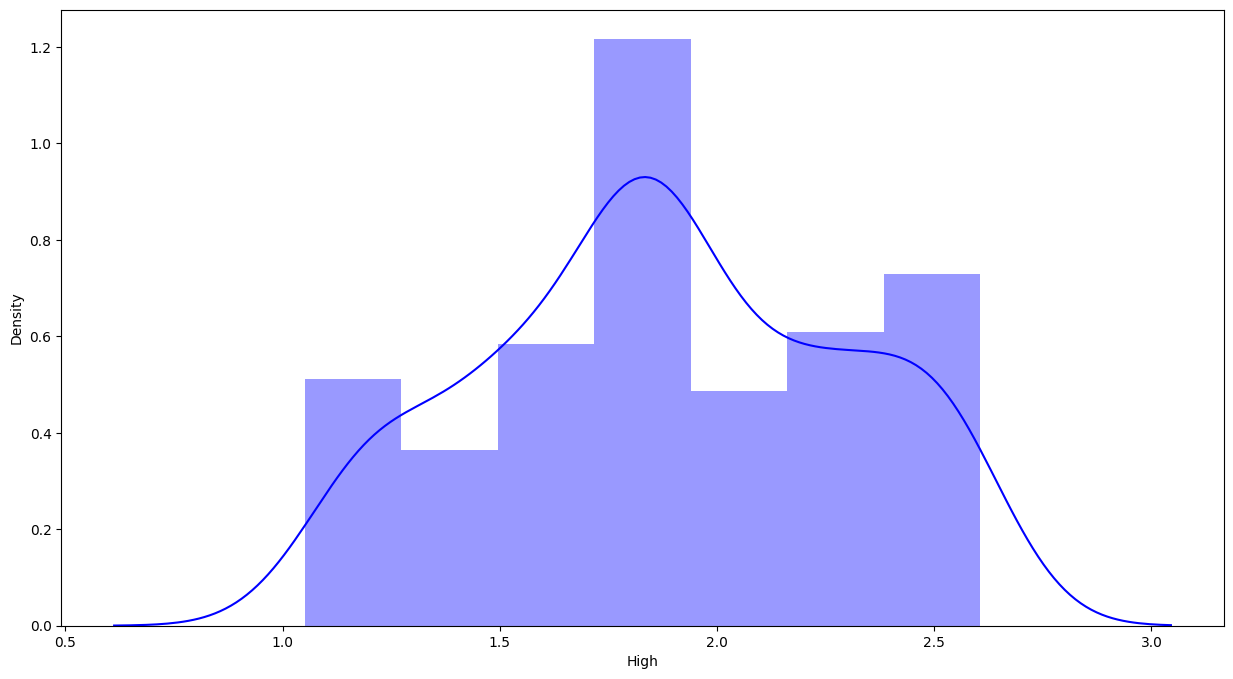

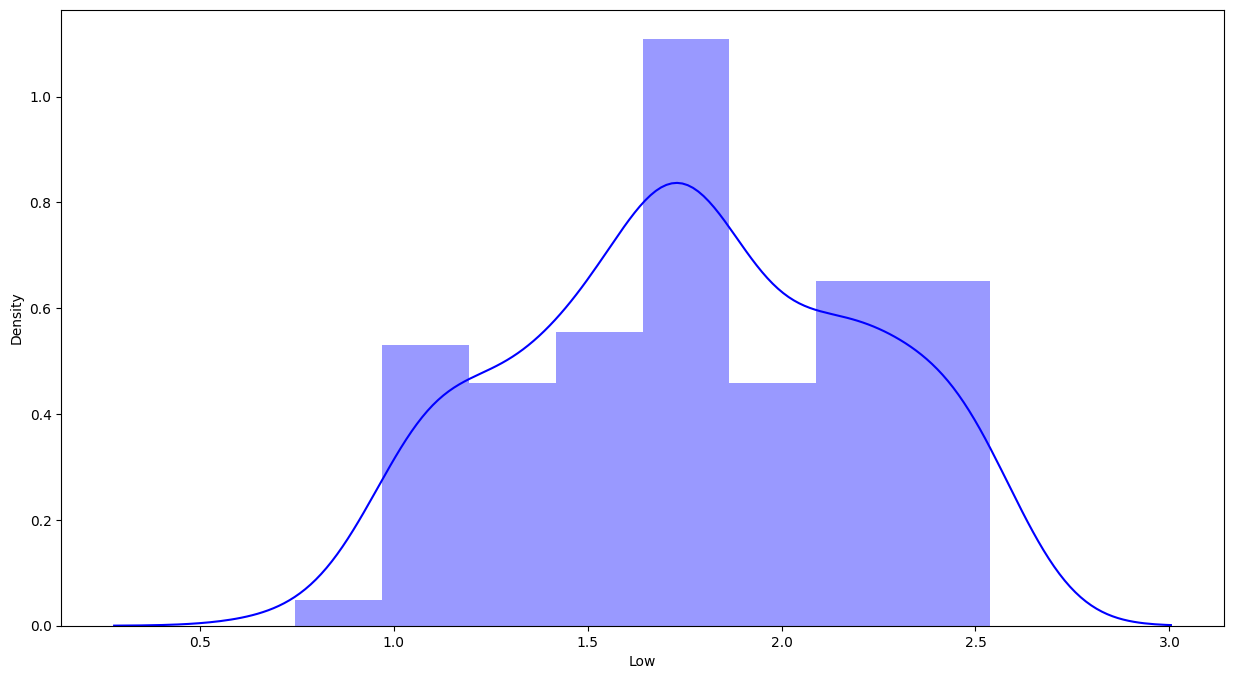

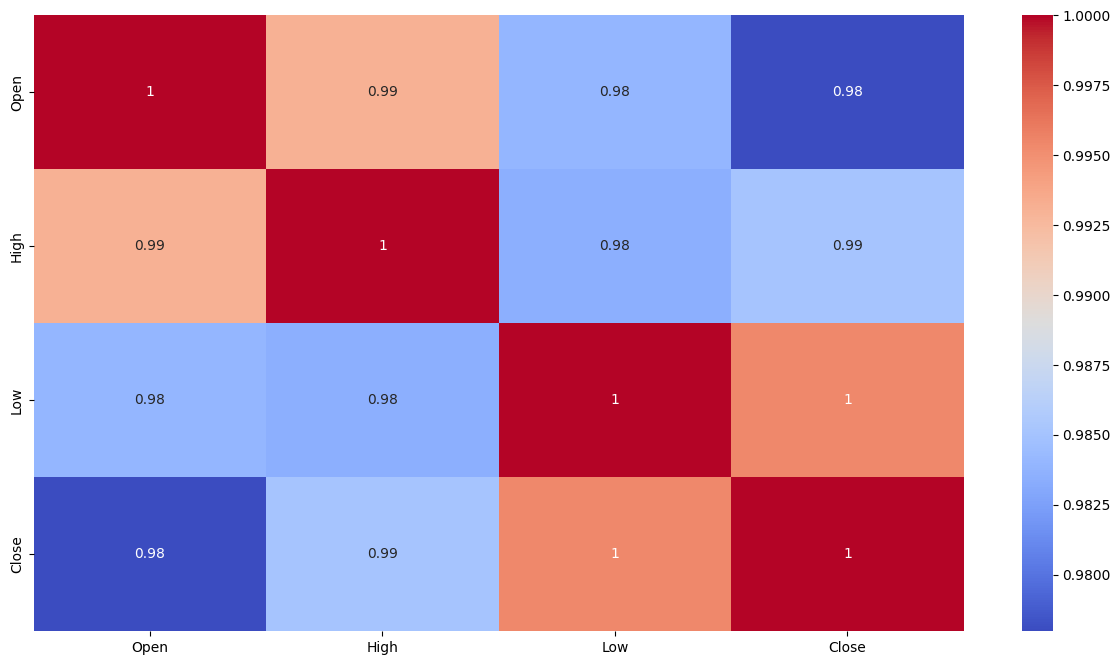

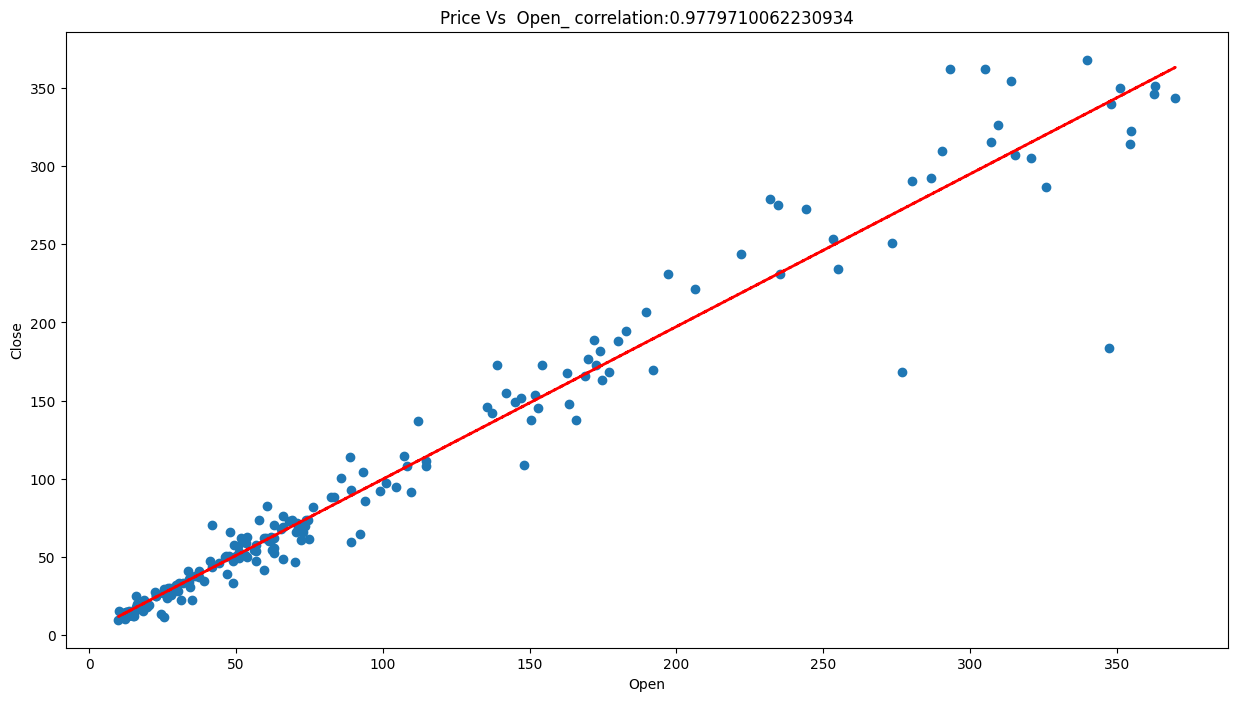

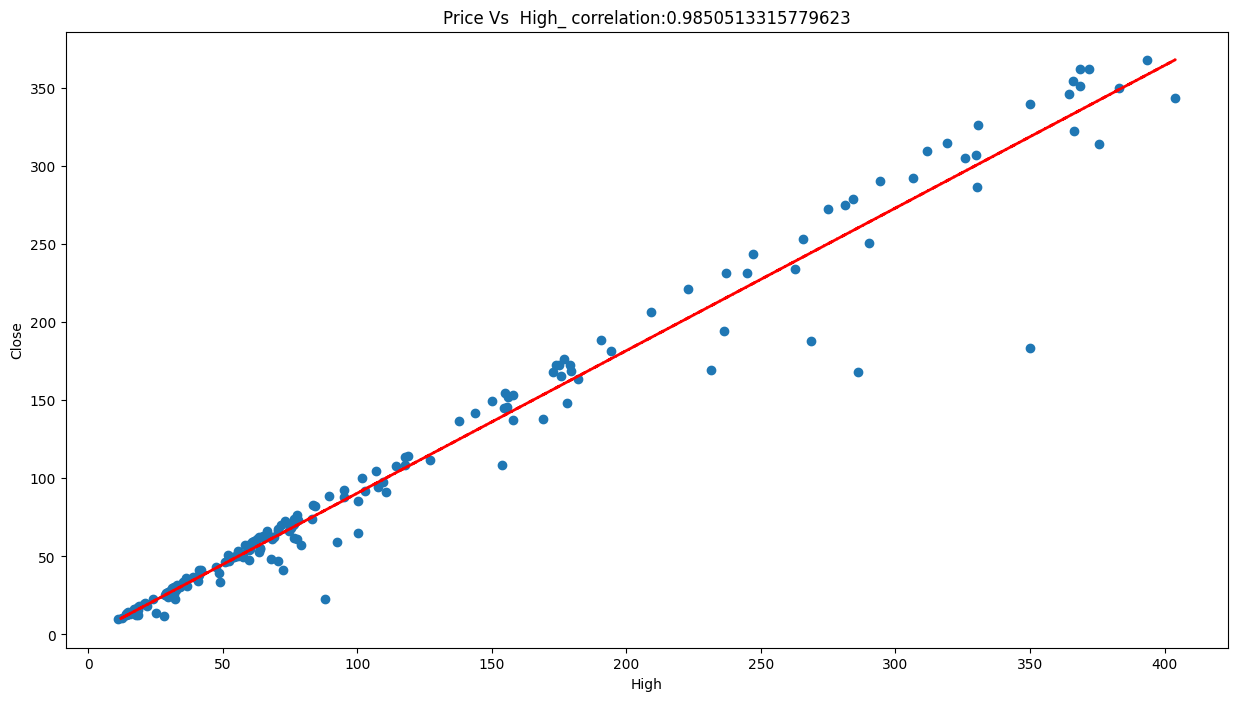

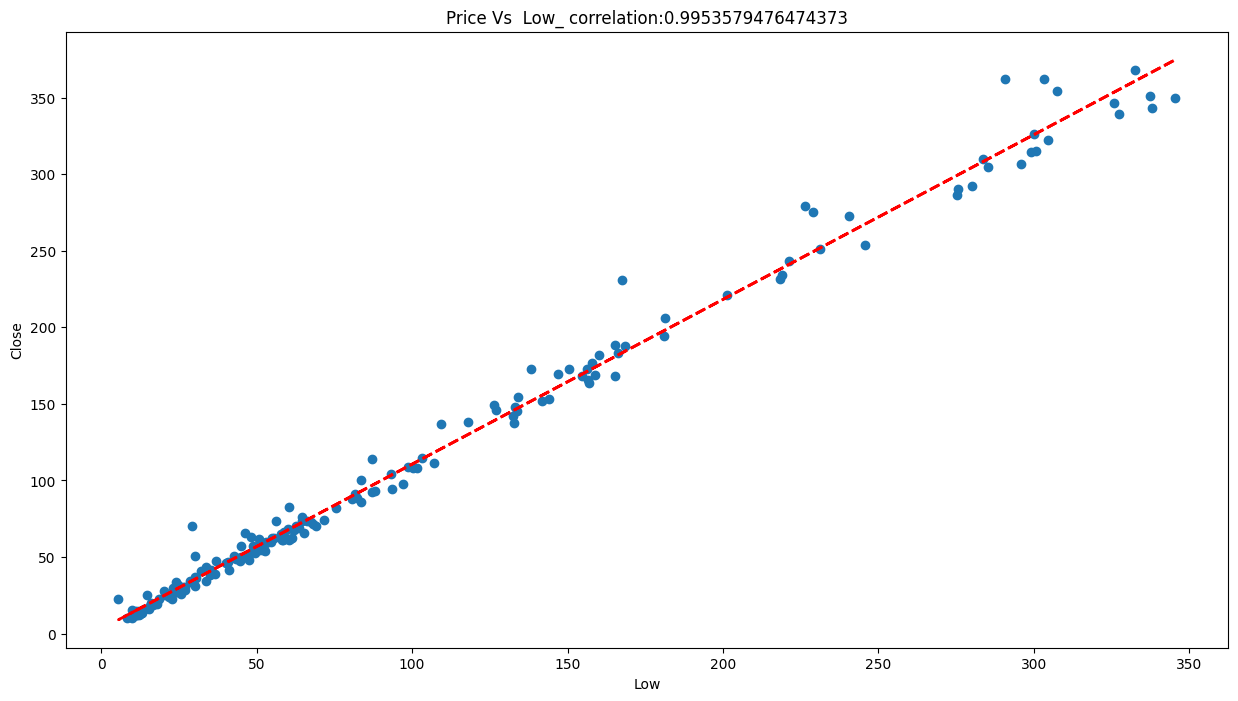

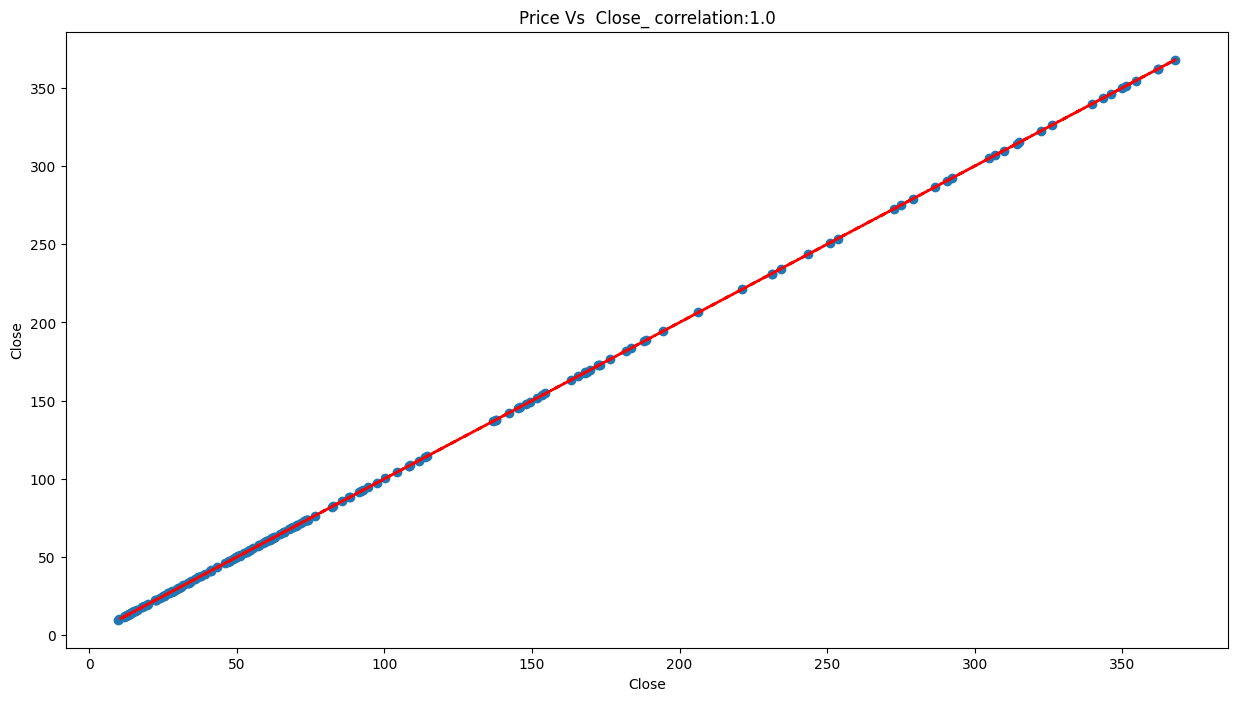

(148, 3)
(37, 3)
(148,)
(37,)
MSE : 0.03158251893048738
RMSE : 0.17771471219481907
MAE : 0.15128511034606282
R2 : 0.8225699915389754
MSE : 0.033659395765946676
RMSE : 0.18346497149577812
MAE : 0.1559169766820056
R2 : 0.8146653424416905


<Figure size 1500x800 with 0 Axes>

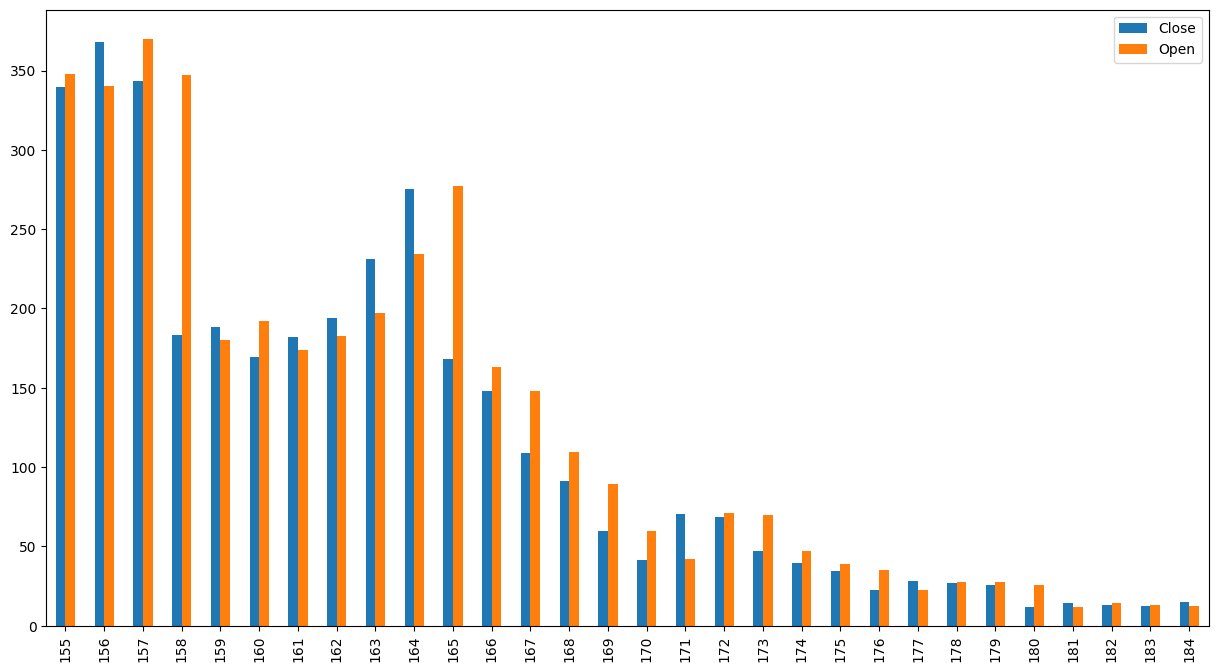

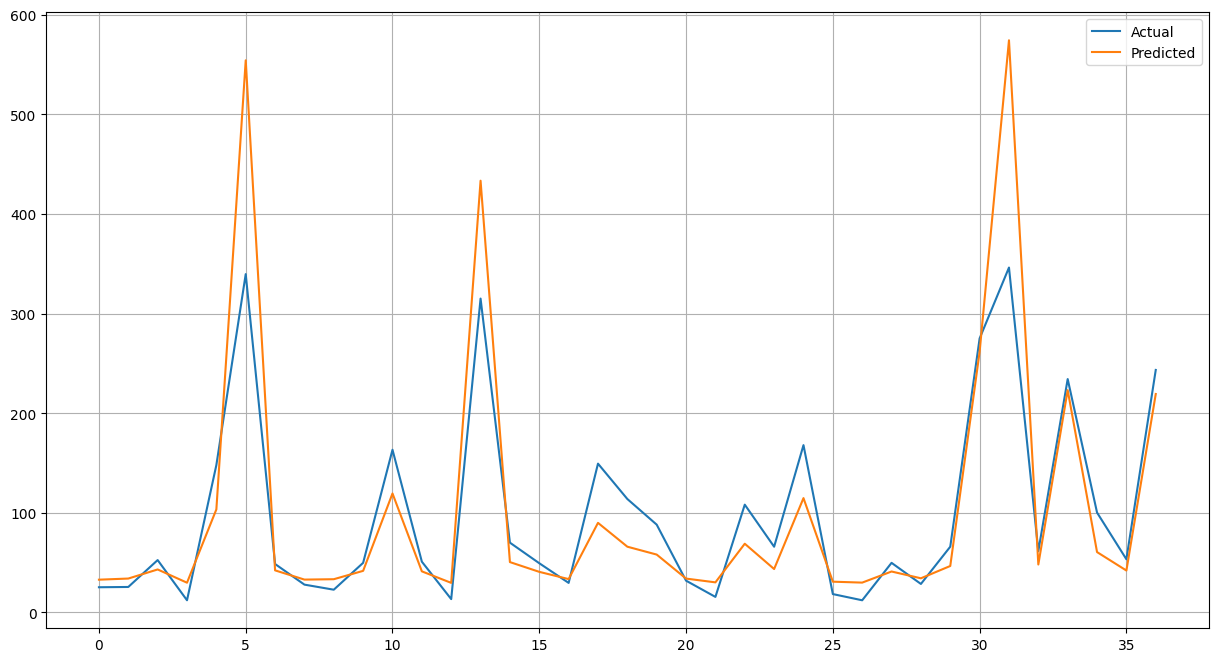

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')


dataset = pd.read_csv('/content/data_YesBank_StockPrices.csv')
dataset.head()


dataset.tail()

dataset.info()

dataset.shape

numerical_col = dataset.describe().columns

for i in numerical_col[:]:
  fig = plt.figure(figsize=(15,8))
  ax = fig.gca()
  features = dataset[i]
  label = dataset['Close']
  features.hist(bins = 50,ax = ax,color = 'blue')
  ax.axvline(features.mean(),color = 'magenta',linestyle = 'dashed',linewidth = 2)
  ax.axvline(features.median(),color = 'cyan',linestyle = 'dashed',linewidth = 2)
  ax.set_title(i)


from datetime import datetime
dataset['Date'] = pd.to_datetime(dataset['Date'].apply(lambda x: datetime.strptime(x,'%b-%y')))

dataset.describe(include='all')

numerical_col = dataset.describe().columns
numerical_col

plt.figure(figsize=(15,8))
plt.plot(dataset['Close'])
plt.plot(dataset['Open'])
plt.plot(dataset['High'])
plt.legend(['Close','Open','High'])
plt.grid()

dataset.isnull().sum()

len(dataset[dataset.duplicated()])


plt.figure(figsize=(15,8))
dataset.boxplot('Open')
plt.show()

plt.figure(figsize=(15,8))
sns.distplot(dataset['Close'],color='blue')
plt.show()

plt.figure(figsize=(15,8))
sns.distplot(np.log10(dataset['Close']),color='blue')
plt.show()


plt.figure(figsize=(15,8))
sns.distplot(dataset['Open'], color='blue')

plt.figure(figsize=(15,8))
sns.distplot(dataset['High'], color='blue')

plt.figure(figsize=(15,8))
sns.distplot(dataset['Low'], color='blue')

plt.figure(figsize=(15,8))
sns.distplot(np.log10(dataset['Open']), color='blue')

plt.figure(figsize=(15,8))
sns.distplot(np.log10(dataset['High']), color='blue')

plt.figure(figsize=(15,8))
sns.distplot(np.log10(dataset['Low']), color='blue')

corr = dataset.corr()
plt.figure(figsize = (15,8))
sns.heatmap(abs(corr),annot = True,cmap = 'coolwarm')

for col in numerical_col[:]:
  fig = plt.figure(figsize = (15,8))
  ax = fig.gca()
  features = dataset[col]
  label = dataset['Close']
  correlation = features.corr(label)
  plt.scatter(x = features,y = label)
  plt.xlabel(col)
  plt.ylabel('Close')
  plt.title('Price Vs  ' + col + '_ correlation:' + str(correlation))
  z = np.polyfit(dataset[col],dataset['Close'],1)
  y_hat = np.poly1d(z)(dataset[col])
  plt.plot(dataset[col] , y_hat, "r--",lw = 2)
plt.show()

from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_vif(X):
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

  return(vif)

cal_vif(dataset[[i for i in dataset.describe().columns if i not in ['Close','Date']]])



plt.figure(figsize=(15,8))
dataset[['Close','Open']].tail(30).plot(kind='bar',figsize=(15,8))

# **Linear Regression Model**

X = dataset.drop(columns=['Close','Date']).apply(zscore)
y = np.log10(dataset['Close'])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 1)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


reg = LinearRegression()
reg_model = reg.fit(X_train,y_train)

reg.score(X_train,y_train)

y_test_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)


reg.intercept_

reg.coef_

# Test Performance
print("MSE :",mean_squared_error(y_test, y_test_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_test_pred)))
print("MAE :",mean_absolute_error(y_test, y_test_pred))
print("R2 :",r2_score(y_test, y_test_pred))


# Train Performance
print("MSE :",mean_squared_error(y_train, y_train_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_train, y_train_pred)))
print("MAE :",mean_absolute_error(y_train, y_train_pred))
print("R2 :",r2_score(y_train, y_train_pred))


# Linear Regression Plotting
plt.figure(figsize=(15,8))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_test_pred))
plt.legend(['Actual','Predicted'])
plt.grid()
plt.show()